In [2]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy.integrate import quad
import os

In [3]:
lmax = 2000
Tcmb  = 2.726e6    # CMB temperature in microkelvin?
rlmin, rlmax = 2, 2000 # CMB multipole range for reconstruction
nside = 2048
bstype = 'equi'
nsims = 448 # Number of simulations to average over (in sets of 3) 
ellmin = 2 
ellmax = 2000 ##### check!!!! vs sims
ls, cl_unl, cl_len, cl_phi = np.loadtxt('/home/amb257/kappa_bispec/make_sims_parallel/camb_lencl_phi.txt')
L_lots = np.arange(rlmax+1)
Lfac = (L_lots*(L_lots+1.) / 2 )**2
lcl = cl_len[0:rlmax+1] / Tcmb**2
print('lcl not interp', lcl[lmax])
ucl = cl_unl[0:rlmax+1] / Tcmb**2 #dimless unlensed T Cl
cl_kappa = Lfac * cl_phi[0:rlmax+1]
l_bins = np.arange(0,100,10)
cl_where = cl_kappa[l_bins]
print(cl_where)

lcl not interp 4.6554353095210565e-17
[0.00000000e+00 1.66870490e-07 2.06031272e-07 2.17543630e-07
 2.17004910e-07 2.10657754e-07 2.01537811e-07 1.91161657e-07
 1.80472047e-07 1.69897924e-07]


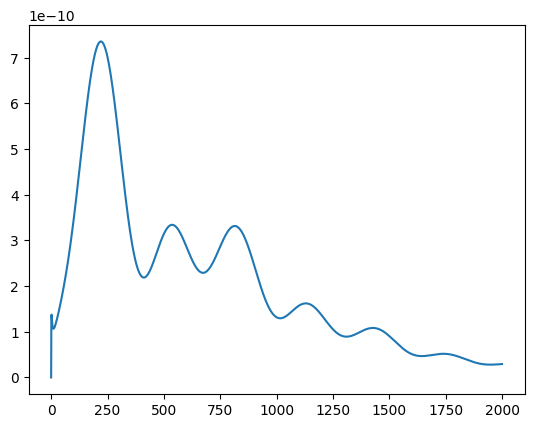

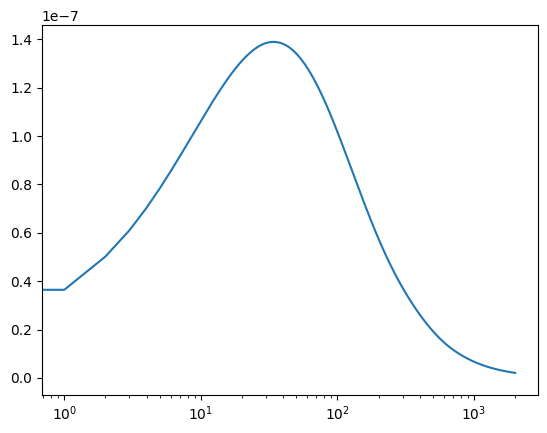

In [4]:
# Running some checks on the power spectra used

# Define the directory where power spec are stored
input_dir = "power_spec"

# Load the power spec
L = np.load(os.path.join(input_dir, "L.npy"))
cl_phi = np.load(os.path.join(input_dir, "cl_phi.npy"))
ucl = np.load(os.path.join(input_dir, "ucl.npy"))
ctot = np.load(os.path.join(input_dir, "ctot.npy"))

plt.plot(L, L*(L+1) / (2*np.pi) *ucl)
plt.show()
plt.plot(L, (L*(L+1))**2*cl_phi /  (2*np.pi))
plt.xscale('log')
plt.show()

[  1.  11.  21.  31.  41.  51.  61.  71.  81.  91. 101. 111. 121. 131.
 141. 151. 161. 171. 181. 191.]
[-6.13937632e-14 -1.80999082e-12 -2.95146970e-12 -3.40473716e-12
 -3.46952497e-12 -3.33859951e-12 -3.12668072e-12 -2.87153368e-12
 -2.61513632e-12 -2.37172985e-12 -2.14950995e-12 -1.95008171e-12
 -1.77368721e-12 -1.61876246e-12 -1.48336347e-12 -1.36504569e-12
 -1.26153401e-12 -1.17086608e-12 -1.09129948e-12 -1.02115820e-12]


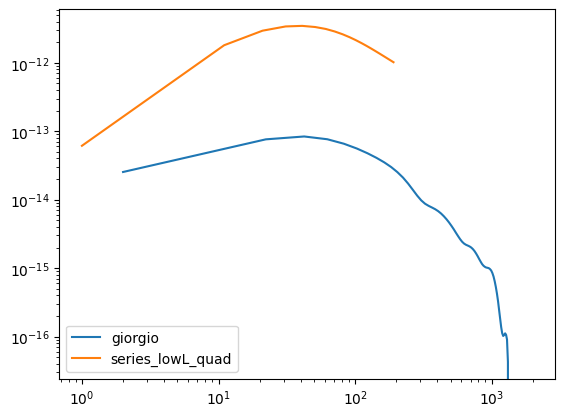

In [5]:
LensingL, testquad = np.loadtxt('TEST_quad_equi.txt')
print(LensingL)
print(testquad)
LensingL, testdirect = np.loadtxt('TEST_direct_equi.txt')
_, minusincorrect_testquad = np.loadtxt('minusincorrect_TEST_quad_equi.txt')
_, minusincorrect_testdirect = np.loadtxt('minusincorrect_TEST_direct_equi.txt')
# import giorgio results
L_analytic, N2_6pt = np.loadtxt("/home/amb257/kappa_bispec/optimal_est/Plots/data/data_for_paper/numerical_N2/Giorgio_equi_N2_analytic.txt")
plt.loglog(L_analytic, N2_6pt, label='giorgio')
plt.loglog(LensingL,-1*testquad, label='series_lowL_quad')
#plt.loglog(LensingL, -1*testdirect, ls = '--', label='series_lowL_directsum')
#plt.loglog(LensingL, minusincorrect_testquad, label='minusincorrect_series_lowL_quad')
#plt.xlim(1,200)
plt.legend()

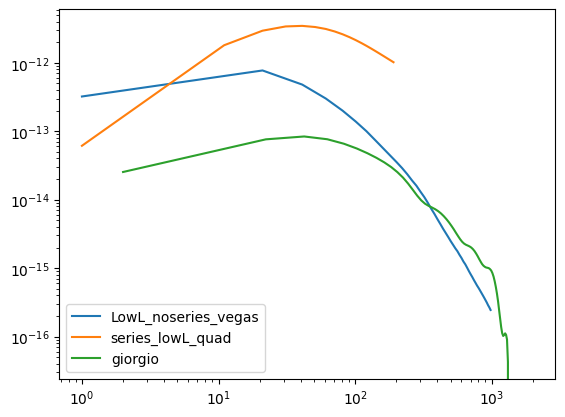

In [9]:
input_dir = "vegas_results"
L = np.load(os.path.join(input_dir, "L.npy"))

Lfac_kappa = (0.5*L*(L+1))**3 
vegas_lowL = np.load(os.path.join(input_dir, "VEGAS_lowL.npy"))
nonoise_vegas_lowL = np.load(os.path.join(input_dir, "nonoise_VEGAS_lowL.npy"))

#plt.loglog(L, Lfac_kappa*nonoise_vegas_lowL, label = 'nonoise_LowL_noseries_vegas')
plt.loglog(L, Lfac_kappa*vegas_lowL, label = 'LowL_noseries_vegas')
plt.loglog(LensingL,-1*testquad, label='series_lowL_quad')

#plt.loglog(LensingL,-1*testquad, label='series_lowL_quad')
plt.loglog(L_analytic, N2_6pt, label='giorgio')
plt.legend()

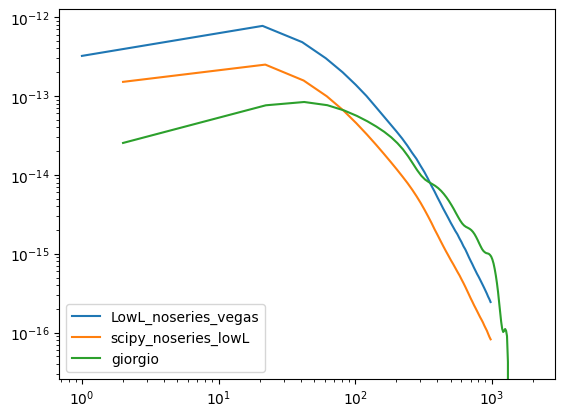

In [13]:
input_dir = "scipy_results"
L_scipy = np.load(os.path.join(input_dir, "L.npy"))

Lfac_kappa_scipy = (0.5*L_scipy*(L_scipy+1))**3 
scipy_lowL = np.load(os.path.join(input_dir, "scipy_lowL_noseries.npy"))
plt.loglog(L, Lfac_kappa*vegas_lowL, label = 'LowL_noseries_vegas')

#plt.loglog(L, Lfac_kappa*nonoise_vegas_lowL, label = 'nonoise_LowL_noseries_vegas')
plt.loglog(L_scipy, Lfac_kappa_scipy*scipy_lowL, label = 'scipy_noseries_lowL')

#plt.loglog(LensingL,-1*testquad, label='series_lowL_quad')
plt.loglog(L_analytic, N2_6pt, label='giorgio')
plt.legend()

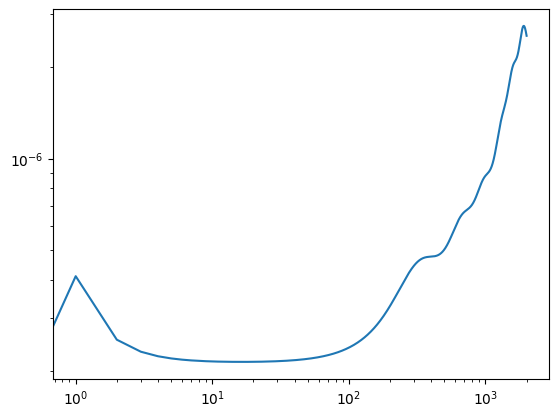

In [23]:
L_norm, norm_phi = np.loadtxt('norm_phi.txt')
Lfac_norm = (0.5*L_norm*(L_norm+1.))**2
plt.loglog(L_norm, Lfac_norm*norm_phi)
#This looks legit.

In [ ]:
L, out = np.loadtxt('SERIES_lowLN2_out.txt')
L, full_int_out = np.loadtxt('lowLN2_out.txt')
plt.loglog(L_analytic, N2_6pt)
plt.loglog(L, out, label = 'series')
plt.plot(L, full_int_out, label = 'full')
plt.xlim(2,100)
#plt.ylim(1e-13,1e-8)
plt.legend()
plt.ylabel('N2')
#plt.yscale('log')

OSError: SERIES_lowLN2_out.txt not found.

In [ ]:
L, int = np.loadtxt('series_integrand.txt')
plt.plot(L, int)
print(int)
print(np.sum(int))

: 

In [ ]:
# Load in the integrand used for the direct sum calculation
ell, integrand = np.loadtxt('/home/amb257/kappa_bispec/bispec_opt_est/N2_numerical/integrand_direct_sum_10.0.txt')
plt.plot(ell, integrand)
print(np.sum(integrand))
integral = np.trapz(integrand, ell)
print(integral)
plt.xlim(500,800)

: 

In [ ]:
L, direct_int = np.loadtxt('new_direct_sum_integeral.txt')
#L, direct_int = np.loadtxt('integral_direct_sum_10.0.txt')
plt.plot(L, direct_int)
plt.xlabel('L')
print(direct_int)

: 

In [ ]:
plt.loglog(L_lots, cl_kappa**2)
plt.xlim(20,1000)

: 

: 

In [ ]:
L, ctotprime = np.loadtxt('ctotprime.txt')
L, lclprime = np.loadtxt('lclprime.txt')
L, lcldoubleprime = np.loadtxt('lcldoubleprime.txt')
L, lcl = np.loadtxt('lcl.txt')
L, ocl = np.loadtxt('ocl.txt')
plt.plot(L, L* lclprime / lcl, label='lclprime')
plt.plot(L, L* ctotprime / lcl, label = 'ctotprime')
plt.xscale('log')
plt.legend()

: 

In [ ]:
plt.plot(L, L* ctotprime / lcl - L* lclprime / lcl)

: 

In [ ]:
plt.loglog(L, lcl, label = 'lcl')
plt.loglog(L, ocl-lcl, label = 'ocl-lcl')
plt.legend()

: 

In [ ]:
print(lcl[0:2])
print(ocl[0:2])

: 

In [ ]:
plt.plot(L, L**2 / lcl * lcldoubleprime)

: 

In [ ]:
import numpy as np
from numpy import random 
from scipy.integrate import quad
# Define a random integrand
def integrand_fn(ell):
    integrand = 1e-11*np.cos(ell / 100) * np.sin(ell / 300) + random.rand()*1e-12
    return integrand

# Set integration limits
ellmin = 2
ellmax = 100

integrand_values = []
for ell in np.arange(ellmin, ellmax + 1):
    integrand = integrand_fn(ell)
    integrand_values.append(integrand)

# Now write some code to integrate this using quad
integral_quad, error = quad(integrand_fn, ellmin, ellmax, limit=1000)

# Now compute the same integrand using direct summation
integral_direct_sum = np.sum(integrand_values)

print('quad', integral_quad)
print('direct sum', integral_direct_sum)

: 

In [ ]:
ell = np.arange(ellmin, ellmax + 1)
plt.plot(ell, integrand_values)


: 

: 